# GG4257 - Urban Analytics
---
## Assignment 1
---

### Lab 3 Challenges

add in a table with hyperlinks to each challenge

In [ ]:
# importing everything needed!
import requests
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
from sodapy import Socrata
import numpy as np
from lonboard import Map, ScatterplotLayer

### Challenge 1

**What happens if you have non-numerical attributes?**

Please extend the `data_description` function to only accept numerical columns and calculate mean and counts. The outcome should be a table with Mean and Counts per Column.

> Tip: Check this function in pandas to filter the numerical values. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes
> Here some extra resources of creating function in python https://www.geeksforgeeks.org/python-functions/?ref=lbp


In [ ]:
def data_description2(x):
    if x.dtype == "object":
        print("NA - not float or integer")
        return
    else:
        stats = {'M': x.mean(), 'S': len(x)}
    return stats
        

def data_description3(x):
    filterx = x.select_dtypes(include=None, exclude="object")
    xStats = pd.DataFrame(columns=df1.columns, index= ) 
    stats = {'M': filterx.mean(), 'S': len(filterx)}
#    return stats


#subset_listings.select_dtypes(include=None, exclude="object")


### Challenge 2

Now is your turn to find, read, process and then make a comprehensive descriptive statistics analysis based on the previous resources and others you might need to look at. Create insightful visualizations combining both maps and charts to convey meaningful information about a chosen city.

1. Define a problem within the urban environment and choose a dataset related to urban life or city dynamics. This could include data on crime rates, housing prices, transportation, demographics, or any other urban-related dataset.
2. Get the data ideally using an **API, or web services**. But it's fine if you need to download the data. Describe why you had to use the traditional  method.
3. Work with the data cleaning and pre-processing, check for missing values, convert data types, and perform any other necessary preprocessing steps. You have the code for that in this and previous labs.
4. Use Pandas to calculate descriptive statistics such as `mean`, `median`, `standard deviation`, and other relevant measures. Explore `correlations` between different variables (Include at least one `univariate` and `bivariate` plots) 
6. Create at least one (or more) interactive map to visualize spatial aspects of the data. For example, plot crime rates across different neighbourhoods or visualize housing prices.
7. Complement with additional charts (line charts, bar charts, etc.) to extend the map and highlight key trends or patterns in the data.
8. As always, document well what you are doing and how you use `descriptive statistics and map visualizations` to extract insights from the data.
> You could try explaining any observed patterns, trends, or correlations, whether they are spatial or non-spatial. **Keep in mind** the defined problem and whether your analysis provides the required insights (Your conclusion could be that you need more data or another type of analysis)

In [ ]:
url_water = "https://services1.arcgis.com/cNVyNtjGVZybOQWZ/arcgis/rest/services/Drinking_fountains/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"
response = requests.get(url_water) #result is 200 so we know the request works!
data = response.json()
waterdata = data["features"]
waterdata

In [ ]:
id_list=[]
suburb_list=[]
long_list=[]
lat_list=[]
site_name_list =[]
location_list=[]
access_list =[]

In [ ]:
for entry in waterdata:
    id_entry=entry['id']
    suburb_entry=entry['properties']['Suburb']
    long_entry=entry['geometry']['coordinates'][0]
    lat_entry=entry['geometry']['coordinates'][1]
    site_name_entry=entry['properties']['site_name']
    location_entry=entry['properties']['Location']
    access_entry=entry['properties']['Accessible']
    id_list.append(id_entry)
    suburb_list.append(suburb_entry),
    long_list.append(long_entry)    
    lat_list.append(lat_entry) 
    site_name_list.append(site_name_entry)
    location_list.append(location_entry)
    access_list.append(access_entry)

#for loop running through each entry of the dataframe and picking out the columns we want
# appends the columns we do want into lists

In [ ]:
import geopandas as gpd
waterAccess_data = gpd.GeoDataFrame({
    'id':id_list,
    'suburb':suburb_list,
    'longitude':long_list,
    'latitude':lat_list,
    'site_name':site_name_list,
    'location': location_list,
    'accessibility': access_list
})

#creating a geodataframe with the lists we created in the previous cell!

waterAccess_data #checking the dataframe!

In [ ]:
# checking that we don't have any NAs
waterAccess_data.isna().sum() #there are no NAs in this dataset

In [ ]:
geom = [Point(xy) for xy in zip(waterAccess_data.longitude, waterAccess_data.latitude)] #create a list of latitude, longitude pairs
waterfountains = gpd.GeoDataFrame(waterAccess_data, crs='EPSG:4326', geometry=geom)
waterfountains.explore()

In [ ]:
suburbfountains = waterfountains['suburb'].value_counts()
suburbfountains

In [ ]:
import seaborn as sns
waterfountains.groupby('suburb').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

In [ ]:
waterfountains.explore("accessibility", cmap='Oranges', tiles='Esri_WorldGrayCanvas', zoom_start=100)

In [ ]:
sns.countplot(waterfountains, x="suburb", hue="accessibility", stat="count")
# (Wascomb, 2024)

In [ ]:
import folium
from folium import plugins
from folium.plugins import MeasureControl
from branca.colormap import linear
from branca import colormap
from branca import colormap as cm

In [ ]:
#m = folium.Map([52.368152,4.897582], zoom_start=10)
location=waterfountains[["latitude","longitude"]]

#151.181929
m = folium.Map([-33.878243,151.181929], zoom_start=12)


plugins.MarkerCluster(location).add_to(m)
m

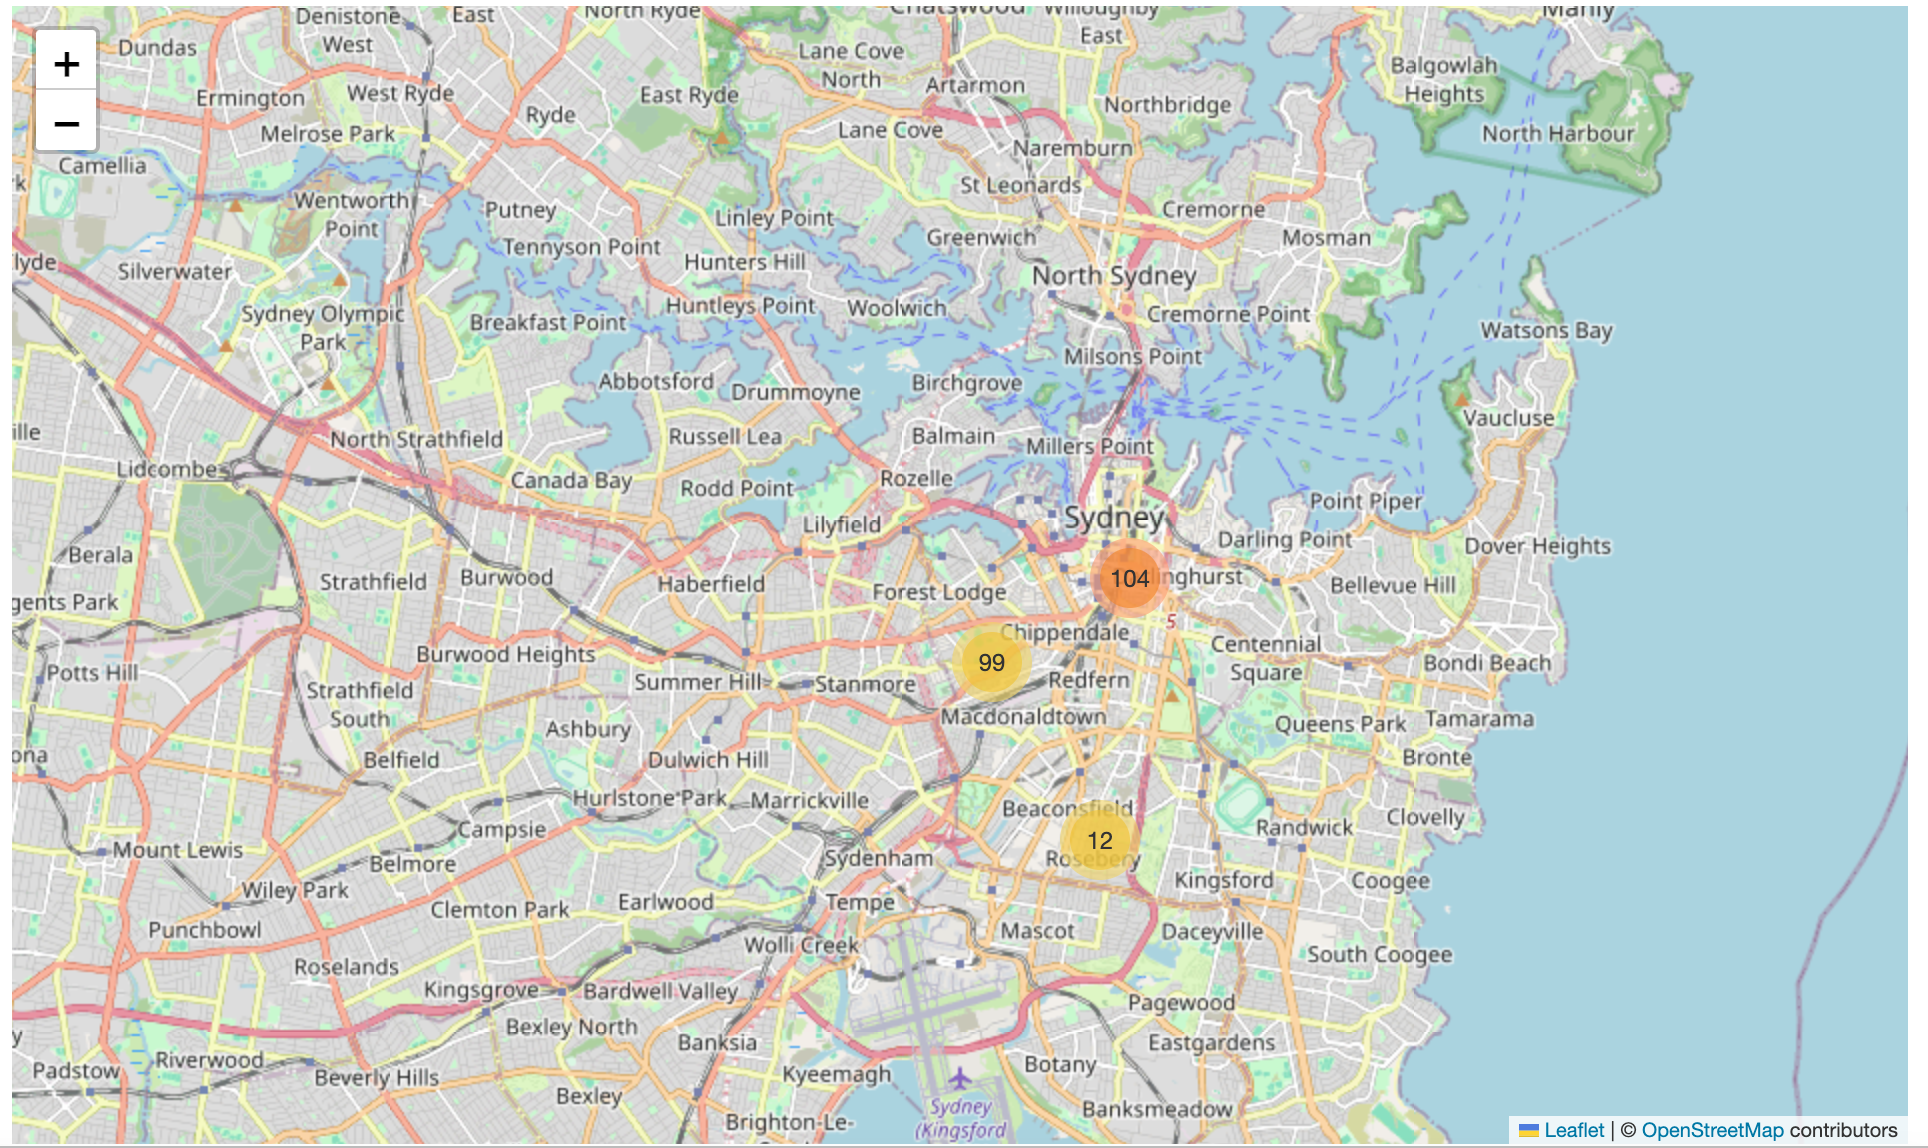

In [ ]:
uniqueSuburbs = waterfountains['suburb'].unique()
colors = sns.color_palette("pastel", len(uniqueSuburbs))
color_dict = dict(zip(uniqueSuburbs, colors)) #dictionary to assign a colour to each suburb!
color_dict

In [ ]:
color_array = np.array([tuple(np.append(
    np.multiply(
        color_dict.get(x, (0, 0, 0)), 255).astype(int), 255)) 
                        for x in waterfountains['suburb']],
                       dtype=np.uint8)

layer = ScatterplotLayer.from_geopandas(waterfountains)
map = Map(layers=[layer], _height=500)
map

layer.radius_scale = 40
layer.opacity = 0.05
layer.get_fill_color = color_array
from lonboard import Map, ScatterplotLayer

layer = ScatterplotLayer.from_geopandas(waterfountains)
map = Map(layers=[layer], _height=500)
map

In [ ]:
sydney_listings =pd.read_csv("listings.csv")

In [ ]:
subset_listings = sydney_listings[['id',
                            'latitude',
                            'longitude',
                            'price',
                           ]]
subset_listings = subset_listings.dropna()
subset_listings.head()
descriptive_stats = subset_listings.describe()
descriptive_stats

In [ ]:
geom = [Point(xy) for xy in zip(subset_listings.longitude, subset_listings.latitude)] #create a list of latitude, longitude pairs
sydney_prices = gpd.GeoDataFrame(subset_listings, crs=waterfountains.crs, geometry=geom)
sydney_prices.explore()

### Challenge 3

1. Go to https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data 
2. Get the data for Motor Vehicle Collisions - Crashes Jan 2024. The dataset contains 2.06 M of records.
3. Use the API endpoint to map the data (e.g. https://data.cityofnewyork.us/resource/h9gi-nx95.json) 
   ![image.png](attachment:8b7103ca-9191-4b67-97c2-0cfb8b8468fc.png)
4. Customize the map by representing the data by `number_of_persons_killed` and `number_of_cyclist_killed`
5. Finally, calculate descriptive statistics for at least two attributes, such as `mean`, `standard deviation`, and other relevant measures 6. Justify/Describe the attribute selection.
7. Plot correlations between the chosen attributes and create `univariate` and/or `multivariate` charts to justify your insights.
   > Please take note that the dataset includes various numerical values. Hence, each student's attribute selection, justification, charts, and maps are expected to vary. 

In [ ]:
client = Socrata("data.cityofnewyork.us",
                 "OqJ1MAAHZwI6PG504OjxCf9cY",
                 username="snft1@st-andrews.ac.uk",
                 password="UARepo2024")
results = client.get("h9gi-nx95", limit=1000000)
crashes2024 = pd.DataFrame.from_records(results)
crashes2024

In [ ]:
crashes2024.dtypes

In [ ]:
subset_crashes2024 = crashes2024[['crash_date',
                             'number_of_persons_killed',
                             'number_of_cyclist_killed',
                             'number_of_motorist_killed',
                             'number_of_persons_injured',
                             'number_of_cyclist_injured',
                             'number_of_motorist_injured',
                             'longitude',
                             'latitude',
                             'borough',
                           ]]
subset_crashes2024 = subset_crashes2024.dropna()
subset_crashes2024

In [ ]:
# making it a geo data frame
geometry = gpd.points_from_xy(subset_crashes2024['longitude'], subset_crashes2024['latitude'])
geo_crashes2024 = gpd.GeoDataFrame(subset_crashes2024, geometry=geometry, crs='EPSG:4326')

In [ ]:
#geo_crashes2024.loc[geo_crashes2024.index, 'number_of_persons_killed'] = geo_crashes2024['number_of_persons_killed'].astype(float)
#geo_crashes2024.loc[geo_crashes2024.index, 'number_of_cyclist_killed'] = geo_crashes2024['number_of_cyclist_killed'].astype(float)
#geo_crashes2024.loc[geo_crashes2024.index, 'number_of_motorist_killed'] = geo_crashes2024['number_of_motorist_killed'].astype(float)

# my laptop doesn't like changing datatypes of existing columns so we'll make new columns and drop the old ones
geo_crashes2024['new_number_of_persons_killed'] = geo_crashes2024['number_of_persons_killed'].astype(float)
geo_crashes2024['new_number_of_cyclist_killed'] = geo_crashes2024['number_of_cyclist_killed'].astype(float)
geo_crashes2024['new_number_of_motorist_killed'] = geo_crashes2024['number_of_motorist_killed'].astype(float)
geo_crashes2024['new_number_of_cyclist_injured'] = geo_crashes2024['number_of_cyclist_injured'].astype(float)
geo_crashes2024['new_number_of_persons_injured'] = geo_crashes2024['number_of_persons_injured'].astype(float)
geo_crashes2024['new_number_of_motorist_injured'] = geo_crashes2024['number_of_motorist_injured'].astype(float)

In [ ]:
update_geo_crashes2024 = geo_crashes2024.drop(['number_of_persons_killed', 'number_of_cyclist_killed', 'number_of_motorist_killed','number_of_cyclist_injured','number_of_persons_injured','number_of_motorist_injured' ], axis=1)

In [ ]:
# (Saturn Cloud, 2024)
update_geo_crashes2024 = update_geo_crashes2024.rename(columns={
    'new_number_of_persons_killed': 'number_of_persons_killed',
    'new_number_of_cyclist_killed': 'number_of_cyclist_killed',
    'new_number_of_motorist_killed': 'number_of_motorist_killed',
    'new_number_of_cyclist_injured': 'number_of_cyclist_injured',
    'new_number_of_persons_injured': 'number_of_persons_injured',
    'new_number_of_motorist_injured': 'number_of_motorist_injured'
})

In [ ]:
update_geo_crashes2024.dtypes
geo_crashes2024 = update_geo_crashes2024
geo_crashes2024.dtypes

In [ ]:
from lonboard import Map, ScatterplotLayer

layer = ScatterplotLayer.from_geopandas(geo_crashes2024)

In [ ]:
categories = geo_crashes2024['number_of_persons_killed'].unique()
colours = sns.color_palette("bright", len(categories))

# We create a dictionary to map categories to colours
colour_dict = dict(zip(categories, colors))

colour_array = np.array([tuple(np.append(
    np.multiply(
        colour_dict.get(x, (0, 0, 0)), 255).astype(int), 255)) 
                        for x in geo_crashes2024['number_of_persons_killed']],
                       dtype=np.uint8)
colour_array
layer.radius_scale = 40
layer.opacity = 0.05
layer.get_fill_color = colour_array

In [ ]:
map = Map(layers=[layer], _height=500)
map

In [ ]:
fatalities = geo_crashes2024['number_of_persons_killed'].value_counts()
fatalities

In [ ]:
geo_crashes2024.groupby('number_of_persons_killed').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

In [ ]:
subset_fatalities = geo_crashes2024[['crash_date',
                             'number_of_persons_killed',
                             'longitude',
                             'latitude',
                             'geometry',
                           ]]
subset_cyclists = geo_crashes2024[['crash_date',
                             'number_of_persons_killed',
                             'longitude',
                             'latitude',
                             'geometry',
                           ]]

In [ ]:
from matplotlib import pyplot as plt


In [ ]:

plt.figure(figsize=(10,6))
sns.distplot(geo_crashes2024.number_of_persons_injured,color='r')
plt.title('Total persons injured', size=18)
plt.xlabel('number of people injured', size=14)
plt.ylabel('', size=14)
plt.show()

In [ ]:
sns.countplot(geo_crashes2024, x="borough", stat="count", palette='pastel')


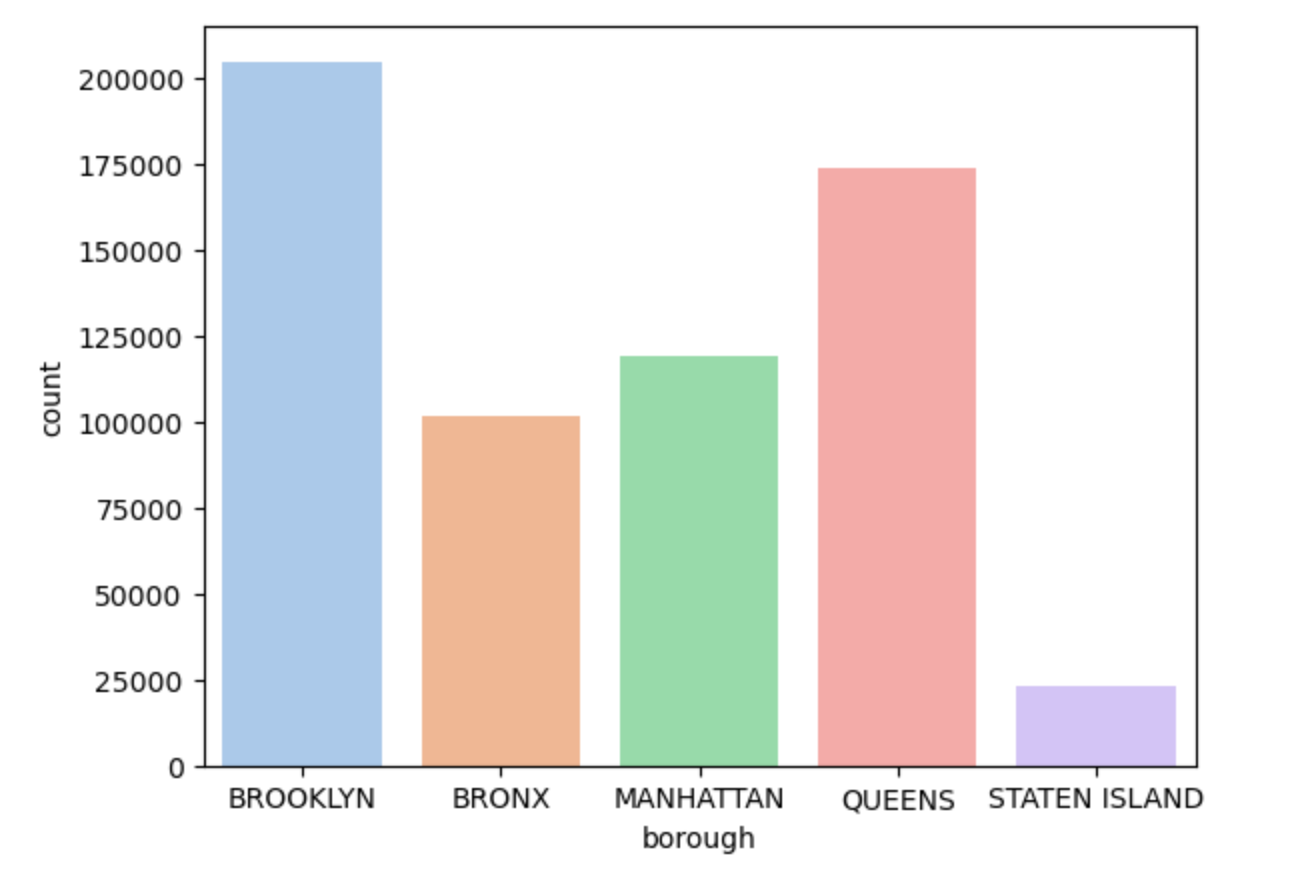
Barchart to show distribution of crashes through different boroughs of New York.

### Challenge 4

1. You worked with two modern libraries to map big data. Can you describe the differences between working with Longboard and Datashader? Which one provides the most exciting functionality, and how do the outcomes from both of them vary?
2. Find a large dataset with at least 5 million records. Consider open datasets, government datasets, or any dataset of interest to you. Ensure the dataset is in a format that can be easily loaded into a Pandas DataFrame (Parquet file or another format).
3. Define a potential problem or scenario for mapping this dataset.
4. Load the dataset into a Pandas DataFrame and explore its structure. Here, **I advice you! to take a small portion of that rather than work with the entire table.**
5. Identify key variables of interest that could be effectively visualized using Datashader(https://datashader.org/index.html#). (e.g. is fine if the datasets have only locations, but we are aiming for at least one additional variable to represent in the map. 
6. Use the previous steps and the Datashader documentation to implement a `hvplot` Map.
7. Discuss/Write any challenges you have encountered related to the challenges and how you addressed them.
8. As always. Provide clear comments and/or citations in your code, explaining each step of the Datashader implementation (**Note: You don't need to run the Datashader pipeline**)
   
9. **For next week**, create a **four-slide presentation** summarizing the problem, data source, dataset, challenges, map, and insights from visualizing the large dataset. **Two slides for Challenge 2** and the **other two for this challenge**. You can also use the Notebooks as a tool to make your presentation. 

# References

- Saturn Cloud (2024) *How to Rename Column and Index with Pandas*. Available at: https://saturncloud.io/blog/how-to-rename-column-and-index-with-pandas/#:~:text=Renaming%20columns%20in%20Pandas%20is,are%20the%20new%20column%20names. (Accessed on 20th February 2024).
- Waskom, M (2024) *seaborn.count*. Available at: https://seaborn.pydata.org/generated/seaborn.countplot.html (Accessed on 19th February 2024).